In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd())
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE,verbose=True)
print(gen)
beam = gen.beam()

plot_dist2d(beam, 'x', 'mm', 'y', 'mm', nbins=50, axis='equal', title_on=True);

AssertionError: ERROR: parsing unsuccessful, could not read /Users/colwyngulliford/GitHub/lume-gpt/examples/templates/eic.25.GeV.precool.injector/distgen.in.yaml

In [ ]:
plot_current_profile(beam, 'ns', 'A', nbins=50, title_on=True);

In [5]:
from gpt import GPT
GPT_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/gpt.in')
GPT()

In [5]:
from gpt.gpt_distgen import run_gpt_with_distgen

GPT_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/eic.25.GeV.precool.injector/distgen.in.yaml')

settings={'n_particle':200, 
          'Ntout':500,
          'space_charge':1,
          'gun_voltage':400,
          'buncher_voltage':50,
          'buncher_relative_phase':-90, 
          'sol_1_current':3.25,
          'sol_2_current':2.5,
          'sol_3_current':2.5,
          'sol_4_current':2.5,
          'cavity_1_voltage':1000}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=True)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
space_charge is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
buncher_relative_phase is in gpt
sol_1_current is in gpt
sol_2_current is in gpt
sol_3_current is in gpt
sol_4_current is in gpt
cavity_1_voltage is in gpt
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp5jsqg2ds/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 2.5 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 0.5 ns, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, s

ValueError: GPT PHASING ERROR: No screen output found. GPT crashed? See last print out above.

In [71]:
plt.plot(G.stat('mean_z'), G.stat('mean_kinetic_energy')/1e3);

KeyError: 'particles'

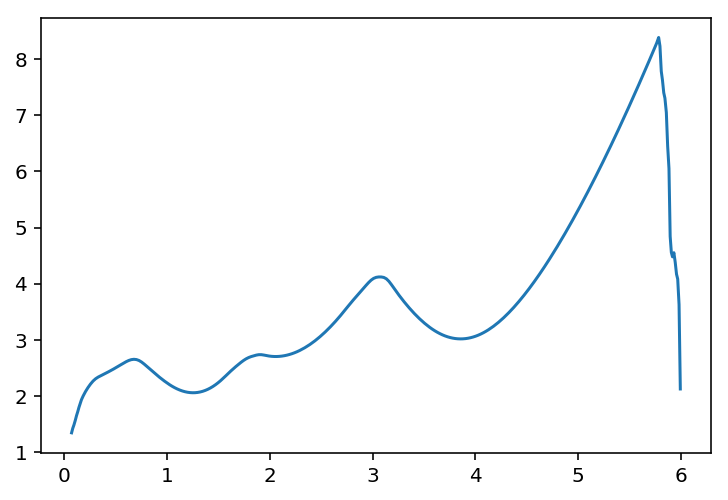

In [69]:
plt.plot(G.stat('mean_z'), G.stat('sigma_x')*1e3);

OSError: CTB.197.MHz.txt not found.